In [1]:
!pip install tensorflow==2.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320.6 MB 52 kB/s 
     |████████████████████████████████| 459 kB 45.7 MB/s 
     |████████████████████████████████| 2.9 MB 18.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall

see more example at

https://www.depends-on-the-definition.com/guide-sequence-tagging-neural-networks-python/

upload ner_pos.zip

In [1]:
!unzip ner_pos.zip

Archive:  ner_pos.zip
  inflating: ner.csv                 
  inflating: ner_dataset.csv         


In [2]:
!head ner.csv

,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,pos,prev-iob,prev-lemma,prev-pos,prev-prev-iob,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,NNS,__START1__,__start1__,__START1__,__START2__,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1,capitalized,Thousands,O
1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,IN,O,thousand,NNS,__START1__,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1,lowercase,of,O
2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,NNS,O,of,IN,O,thousand,NNS,capitalized,Thousands,lowercase,of,1,lowercase,demonstrators,O
3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,VBP,O,demonstr,NNS,O,of,IN,lowercase,of,lowercase,demonstrators,1,lowercase,have,O
4,march,through,london,NNP,capitalized,London,IN,lowerc

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("ner_dataset.csv", encoding="latin1")
data = data.fillna(method="ffill")
data.tail(10)

,Sentence #,Word,POS,Tag
1048565,Sentence: 47958,impact,NN,O
1048566,Sentence: 47958,.,.,O
1048567,Sentence: 47959,Indian,JJ,B-gpe
1048568,Sentence: 47959,forces,NNS,O
1048569,Sentence: 47959,said,VBD,O
1048570,Sentence: 47959,they,PRP,O
1048571,Sentence: 47959,responded,VBD,O
1048572,Sentence: 47959,to,TO,O
1048573,Sentence: 47959,the,DT,O
1048574,Sentence: 47959,attack,NN,O


In [4]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
n_words = len(words)
print(n_words)


35179


In [5]:
print(words[0:10])

['lessen', 'Settled', 'Il', 'defiant', 'Fanning', 'anti-Iraqi', 'include', 'barometer', 'addicts', 'Bei']


In [6]:
tags = list(set(data["Tag"].values))
n_tags = len(tags)
print(n_tags)

17


In [7]:
class SentenceGetter(object):
    
    def __init__(self, data): # data is pandas dataframe
        self.n_sent = 1 # the current sentence
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped] # all sentences
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)] # the current sentence
            self.n_sent += 1 # increment index to next one
            return s
        except:
            return None


In [8]:
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [9]:
sentences = getter.sentences

In [10]:
print(sentences[0])

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


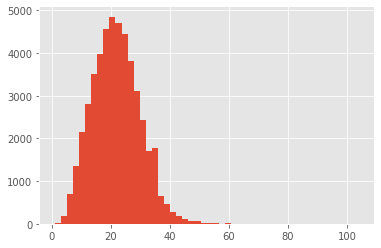

In [11]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

# Build training data for the neural network

In [12]:
max_len = 50 # from the histrogram above, 50 should be enough
word2idx = {w: i for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}


In [13]:
word2idx["Obama"]


34414

In [14]:
tag2idx["B-geo"]


16

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]


In [18]:
print(X[0]) # first sentence, before padding

[31438, 6150, 28752, 5737, 32093, 24676, 11410, 14842, 4725, 28537, 30375, 10684, 8507, 35071, 33017, 28537, 3767, 6150, 26071, 30455, 1412, 29301, 12122, 31145]


In [19]:
type(X)

list

In [20]:
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=n_words - 1)
print(X[0]) # after padding

[31438  6150 28752  5737 32093 24676 11410 14842  4725 28537 30375 10684
  8507 35071 33017 28537  3767  6150 26071 30455  1412 29301 12122 31145
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178 35178
 35178 35178]


In [21]:
type(X)

numpy.ndarray

In [22]:
X.shape

(47959, 50)

In [23]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]


In [24]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])
print(y[0])

[ 5  5  5  5  5  5 16  5  5  5  5  5 16  5  5  5  5  5  7  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5]


In [25]:
print(X.shape)
print(y.shape)

(47959, 50)
(47959, 50)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional


In [29]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words, output_dim=50, input_length=max_len)(input)  # 50-dim embedding
model = Dropout(0.1)(model)
model = Bidirectional( LSTM(units=100, return_sequences=True, recurrent_dropout=0.1) )(model)  # return_sequence must be True
out = TimeDistributed( Dense(n_tags, activation="softmax") )(model)  # apply the last layer to every time step in the sequence


In [30]:
model = Model(input, out)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [32]:
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=5, validation_split=0.1, verbose=1)


Epoch 1/5
1214/1214 [==============================] - 332s 274ms/step - loss: 0.1389 - accuracy: 0.9646 - val_loss: 0.0671 - val_accuracy: 0.9806
Epoch 2/5
1214/1214 [==============================] - 331s 272ms/step - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.0545 - val_accuracy: 0.9838
Epoch 3/5
 967/1214 [======================>.......] - ETA: 1:05 - loss: 0.0457 - accuracy: 0.9868

KeyboardInterrupt: ignored